# Plots for the paper "Perturbative construction of mean-field equations in extensive-rank matrix factorization and denoising"

In [1]:
import numpy as np
import pickle, time
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS)

## Wishart denoising

In [2]:
alphas = np.array([0.1, 0.5, 1.0, 2.0, 5.0])
Deltas = np.array([{'Matytsin':None, 'RIE':None, 'TAP_order_2':None, 'TAP_order_3':None, 'Kabashima':None, 'Kabashima_para':None, 'Annealed':None} for alpha in alphas])
phis = np.array([{'Matytsin':None, 'RIE':None, 'TAP_order_2':None, 'TAP_order_3':None, 'Kabashima':None, 'Kabashima_para':None, 'Annealed':None} for alpha in alphas])
y_mses = np.array([{'Matytsin':None, 'RIE':None, 'TAP_order_2':None, 'TAP_order_3':None, 'Kabashima':None, 'Kabashima_para':None, 'Annealed':None} for alpha in alphas])

### Matytsin

In [3]:
log_NB_points_x = 15
NB_POINTS_t = 3000
log_scale_t = True

for (i_a,alpha) in enumerate(alphas):
    filename = "Data/Matytsin_wishart_alpha_"+str(alpha)+"_log_NB_points_x_"+str(log_NB_points_x)+"_NB_POINTS_t_"+str(NB_POINTS_t)+"_log_scale_t_"+str(int(log_scale_t))+".pkl"
    infile = open(filename,'rb')
    results = pickle.load(infile)
    infile.close()
    Deltas[i_a]['Matytsin'] = results['Deltas']
    y_mses[i_a]['Matytsin'] = results['y_MMSEs']  
    phis[i_a]['Matytsin'] = results['Phis']  

### RIE

In [4]:
M = 3000

for (i_a,alpha) in enumerate(alphas):
    filename = "Data/RIE_wishart_M_"+str(M)+"_alpha_"+str(alpha)+".pkl"
    infile = open(filename,'rb')
    results = pickle.load(infile)
    infile.close()
    Deltas[i_a]['RIE'] = results['Deltas']
    y_mses[i_a]['RIE'] = results['y_mses']  

### TAP denoising 

In [5]:
M = 3000

for (i_a,alpha) in enumerate(alphas):
    order_TAP = 2
    filename = "Data/TAP_wishart_order_"+str(order_TAP)+"_M_"+str(M)+"_alpha_"+str(alpha)+".pkl"
    infile = open(filename,'rb')
    results = pickle.load(infile)
    infile.close()
    Deltas[i_a]['TAP_order_2'] = results['Deltas']
    y_mses[i_a]['TAP_order_2'] = results['mses_y']  
    phis[i_a]['TAP_order_2'] = results['phis']
    
    order_TAP = 3
    filename = "Data/TAP_wishart_order_"+str(order_TAP)+"_M_"+str(M)+"_alpha_"+str(alpha)+".pkl"
    infile = open(filename,'rb')
    results = pickle.load(infile)
    infile.close()
    Deltas[i_a]['TAP_order_3'] = results['Deltas']
    y_mses[i_a]['TAP_order_3'] = results['mses_y']  
    phis[i_a]['TAP_order_3'] = results['phis']

### Comparison plot: MSE and free entropy

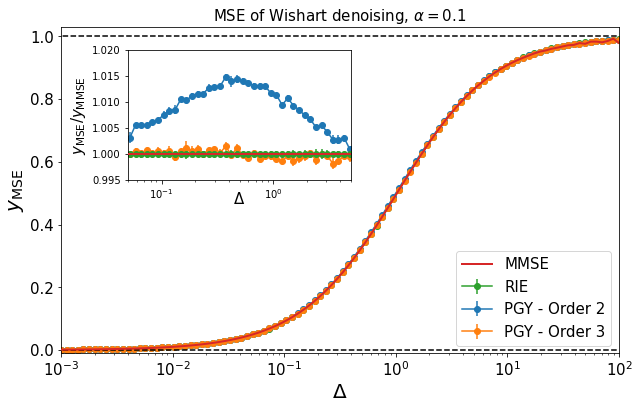

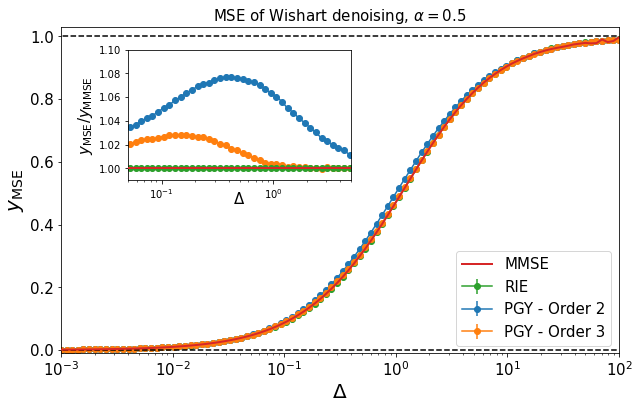

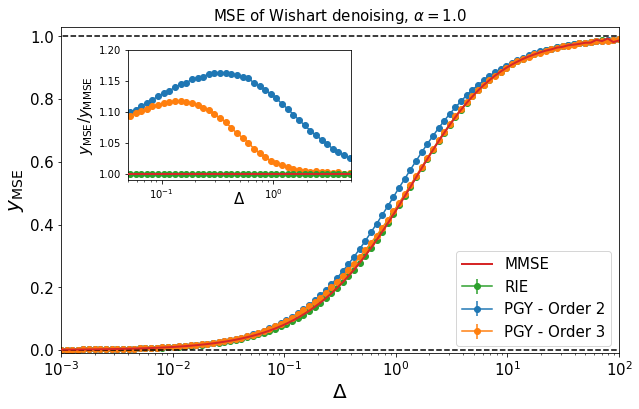

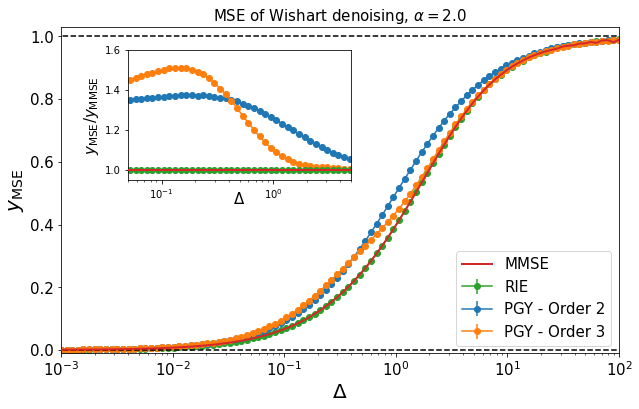

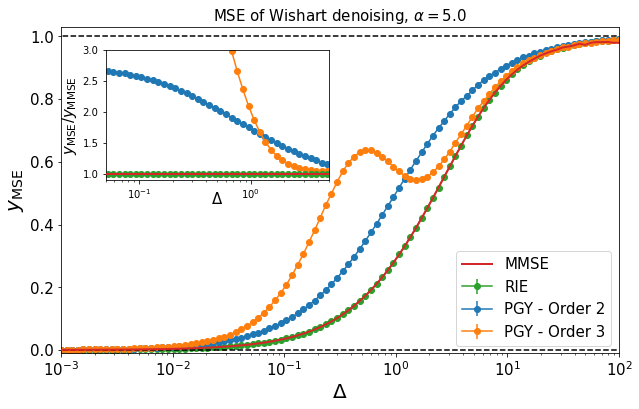

In [6]:
#Limits for the axins plot
xlim_inf = np.array([0.995, 0.99, 0.99, 0.95, 0.9])
xlim_sup = np.array([1.02, 1.1, 1.2, 1.6, 3])
position_inset_x = np.array([0.12, 0.12, 0.12, 0.12, 0.08])

for (i_a,alpha) in enumerate(alphas):
    fig, ax = plt.subplots(1, 1,figsize = (10,6))
    ax.tick_params(labelsize=15)
    ax.plot(Deltas[i_a]['Matytsin'], y_mses[i_a]['Matytsin'], linewidth = 2, label = r'MMSE', zorder = 3, 
           color = colors[3])
    ax.errorbar(Deltas[i_a]['RIE'], np.mean(y_mses[i_a]['RIE'],axis=1), yerr = np.std(y_mses[i_a]['RIE'],axis=1), fmt = 'o-', label = r'RIE', zorder = 1, 
               color = colors[2])
    ax.errorbar(Deltas[i_a]['TAP_order_2'], np.mean(y_mses[i_a]['TAP_order_2'],axis=1), yerr = np.std(y_mses[i_a]['TAP_order_2'],axis=1), fmt = 'o-', label = r'PGY - Order 2', zorder = 1, 
               color = colors[0])
    ax.errorbar(Deltas[i_a]['TAP_order_3'], np.mean(y_mses[i_a]['TAP_order_3'],axis=1), yerr = np.std(y_mses[i_a]['TAP_order_3'],axis=1), fmt = 'o-', label = r'PGY - Order 3', zorder = 1, 
               color = colors[1])
    
    axins = ax.inset_axes([position_inset_x[i_a], 0.53, 0.4, 0.4])
    axins.set_xlim(5e-2, 5e0)
    axins.set_ylim(xlim_inf[i_a], xlim_sup[i_a])
    axins.set_xscale('log')
    axins.set_ylabel(r'$y_\mathrm{MSE}/y_\mathrm{MMSE}$', fontsize = 15)
    axins.set_xlabel(r'$\Delta$', fontsize = 15, labelpad = -10)
    #We use the fact that Deltas[TAP_order_2] = Deltas[TAP_order_3] = Deltas[RIE]
    axins.errorbar(Deltas[i_a]['TAP_order_2'], np.mean(y_mses[i_a]['TAP_order_2'],axis=1)/np.mean(y_mses[i_a]['RIE'],axis=1), yerr = np.std(y_mses[i_a]['TAP_order_2'],axis=1)/np.mean(y_mses[i_a]['RIE'],axis=1), fmt = 'o-', label = r'TAP - Order 2', zorder = 1
                       , color = colors[0])
    axins.errorbar(Deltas[i_a]['TAP_order_3'], np.mean(y_mses[i_a]['TAP_order_3'],axis=1)/np.mean(y_mses[i_a]['RIE'],axis=1), yerr = np.std(y_mses[i_a]['TAP_order_3'],axis=1)/np.mean(y_mses[i_a]['RIE'],axis=1), fmt = 'o-', label = r'TAP - Order 3', zorder = 1
                       , color = colors[1])
    axins.errorbar(Deltas[i_a]['RIE'], np.mean(y_mses[i_a]['RIE'],axis=1)/np.mean(y_mses[i_a]['RIE'],axis=1), yerr = np.std(y_mses[i_a]['RIE'],axis=1)/np.mean(y_mses[i_a]['RIE'],axis=1), fmt = 'o-', label = r'RIE', zorder = 1
     , color = colors[2])
    axins.plot(Deltas[i_a]['Matytsin'], np.ones_like(Deltas[i_a]['Matytsin']), linewidth = 2, label = r'Matytsin', zorder = 3
     , color = colors[3])
    axins.tick_params(labelsize=10)

    ax.set_ylabel(r'$y_\mathrm{MSE}$', fontsize = 20)
    ax.set_xlabel(r'$\Delta$', fontsize = 20)
    ax.set_xscale('log')
    ax.plot([0,1e3],[0,0], '--', color='black')
    ax.plot([0,1e3],[1,1], '--', color='black')
    ax.set_ylim(-0.01,1.03)
    ax.set_xlim(min(Deltas[i_a]['Matytsin']), max(Deltas[i_a]['Matytsin']))
    ax.legend(fontsize = 15)
    ax.set_title(r'MSE of Wishart denoising, $\alpha = $'+str(alpha), fontsize = 15)
    #plt.savefig('figures/wishart_mse_alpha_'+str(alpha)+'.pdf')

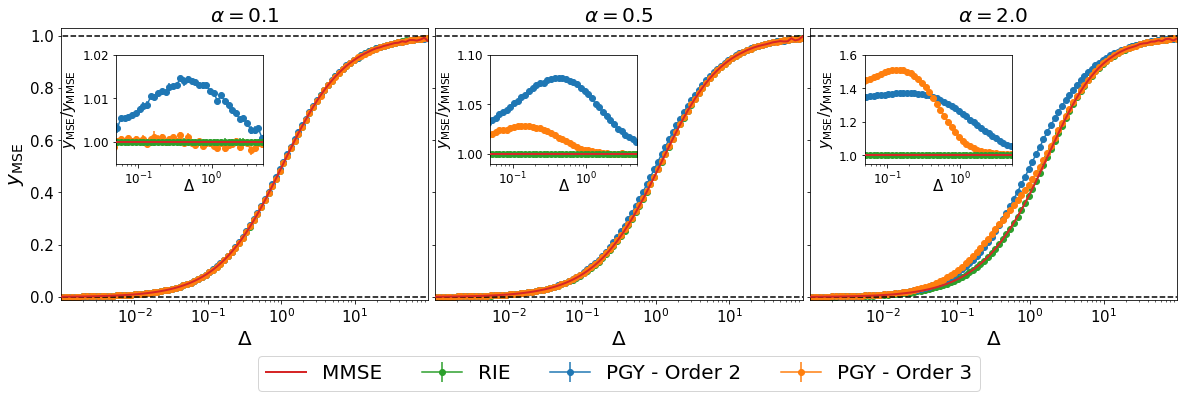

In [7]:
#The plot in the introduction of the paper

xlim_inf = np.array([0.995, 0.99, 0.99, 0.95, 0.9])
xlim_sup = np.array([1.02, 1.1, 1.2, 1.6, 3])
position_inset_x = np.array([0.15, 0.15, 0.15, 0.15, 0.08])

sub_indices_list = [0, 1, 3]
fig, axes = plt.subplots(1, 3,figsize = (20,5), sharey=True)
axes[0].set_ylabel(r'$y_\mathrm{MSE}$', fontsize = 20)

for i in range(len(sub_indices_list)):
    ax = axes[i]
    alpha = alphas[sub_indices_list[i]]
    i_a = np.where(alphas == alpha)[0][0]
    ax.tick_params(labelsize=15)
    ax.plot(Deltas[i_a]['Matytsin'], y_mses[i_a]['Matytsin'], linewidth = 2, label = r'MMSE', zorder = 3, 
           color = colors[3])
    ax.errorbar(Deltas[i_a]['RIE'], np.mean(y_mses[i_a]['RIE'],axis=1), yerr = np.std(y_mses[i_a]['RIE'],axis=1), fmt = 'o-', label = r'RIE', zorder = 1, 
               color = colors[2])
    ax.errorbar(Deltas[i_a]['TAP_order_2'], np.mean(y_mses[i_a]['TAP_order_2'],axis=1), yerr = np.std(y_mses[i_a]['TAP_order_2'],axis=1), fmt = 'o-', label = r'PGY - Order 2', zorder = 1, 
               color = colors[0])
    ax.errorbar(Deltas[i_a]['TAP_order_3'], np.mean(y_mses[i_a]['TAP_order_3'],axis=1), yerr = np.std(y_mses[i_a]['TAP_order_3'],axis=1), fmt = 'o-', label = r'PGY - Order 3', zorder = 1, 
               color = colors[1])
    
    axins = ax.inset_axes([position_inset_x[i_a], 0.5, 0.4, 0.4])
    axins.set_xlim(5e-2, 5e0)
    axins.set_ylim(xlim_inf[i_a], xlim_sup[i_a])
    axins.set_xscale('log')
    axins.set_ylabel(r'$y_\mathrm{MSE}/y_\mathrm{MMSE}$', fontsize = 15)
    axins.set_xlabel(r'$\Delta$', fontsize = 15, labelpad = -10)
    #We use the fact that Deltas[TAP_order_2] = Deltas[TAP_order_3] = Deltas[RIE]
    axins.errorbar(Deltas[i_a]['TAP_order_2'], np.mean(y_mses[i_a]['TAP_order_2'],axis=1)/np.mean(y_mses[i_a]['RIE'],axis=1), yerr = np.std(y_mses[i_a]['TAP_order_2'],axis=1)/np.mean(y_mses[i_a]['RIE'],axis=1), fmt = 'o-', label = r'TAP - Order 2', zorder = 1
                       , color = colors[0])
    axins.errorbar(Deltas[i_a]['TAP_order_3'], np.mean(y_mses[i_a]['TAP_order_3'],axis=1)/np.mean(y_mses[i_a]['RIE'],axis=1), yerr = np.std(y_mses[i_a]['TAP_order_3'],axis=1)/np.mean(y_mses[i_a]['RIE'],axis=1), fmt = 'o-', label = r'TAP - Order 3', zorder = 1
                       , color = colors[1])
    axins.errorbar(Deltas[i_a]['RIE'], np.mean(y_mses[i_a]['RIE'],axis=1)/np.mean(y_mses[i_a]['RIE'],axis=1), yerr = np.std(y_mses[i_a]['RIE'],axis=1)/np.mean(y_mses[i_a]['RIE'],axis=1), fmt = 'o-', label = r'RIE', zorder = 1
     , color = colors[2])
    axins.plot(Deltas[i_a]['Matytsin'], np.ones_like(Deltas[i_a]['Matytsin']), linewidth = 2, label = r'Matytsin', zorder = 3
     , color = colors[3])
    axins.tick_params(labelsize=12)

   
    ax.set_xlabel(r'$\Delta$', fontsize = 20)
    ax.set_xscale('log')
    ax.plot([0,1e3],[0,0], '--', color='black')
    ax.plot([0,1e3],[1,1], '--', color='black')
    ax.set_ylim(-0.01,1.03)
    ax.set_xlim(min(Deltas[i_a]['Matytsin']), max(Deltas[i_a]['Matytsin']))
    ax.set_title(r'$\alpha = $'+str(alpha), fontsize = 20)
    ax.xaxis.set_major_locator(plt.FixedLocator([1e-2,1e-1,1e0,1e1]))
    
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.17),ncol=4, fancybox=True, fontsize = 20)
plt.subplots_adjust(wspace=0.02)
#plt.savefig('figures/wishart_mse_intro.pdf', bbox_inches='tight')

In [9]:
#Loading annealed restuls, and the approximation of Kabashima&al '16 for the free entropy

for (i_a,alpha) in enumerate(alphas):
    #Kabashima: full replica solution
    filename = "Data/kabashima_annealed/kabashima_alpha_"+str(alpha)+".pkl"
    infile = open(filename,'rb')
    results = pickle.load(infile)
    infile.close()
    Deltas[i_a]['Kabashima'] = results['Deltas']
    phis[i_a]['Kabashima'] = results['phis']

    #Kabashima: only paramagnetic
    filename = "Data/kabashima_annealed/kabashima_paramagnetic_alpha_"+str(alpha)+".pkl"
    infile = open(filename,'rb')
    results = pickle.load(infile)
    infile.close()
    Deltas[i_a]['Kabashima_para'] = results['Deltas']
    phis[i_a]['Kabashima_para'] = results['phis']

    #Annealed
    filename = "Data/kabashima_annealed/annealed_alpha_"+str(alpha)+".pkl"
    infile = open(filename,'rb')
    results = pickle.load(infile)
    infile.close()
    Deltas[i_a]['Annealed'] = results['Deltas']
    phis[i_a]['Annealed'] = results['phis']

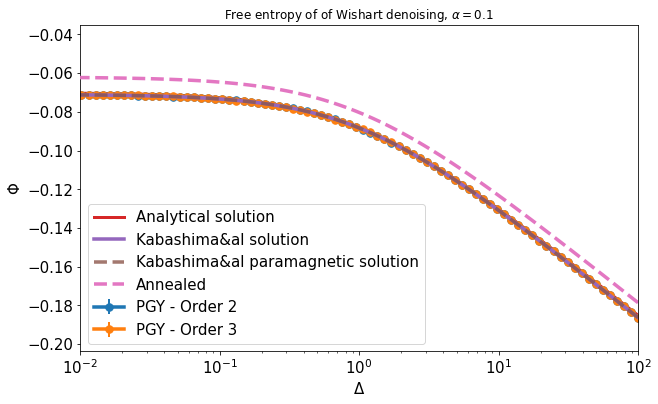

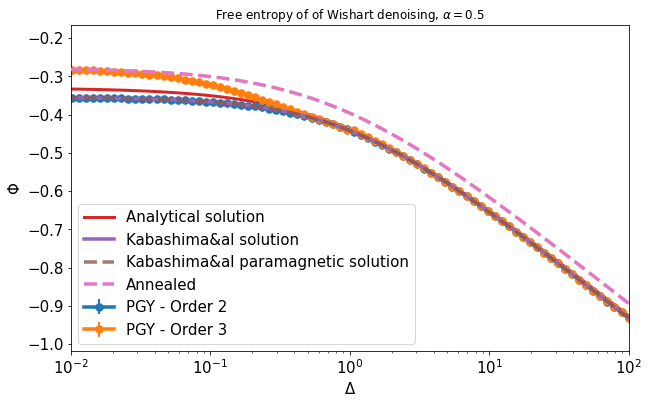

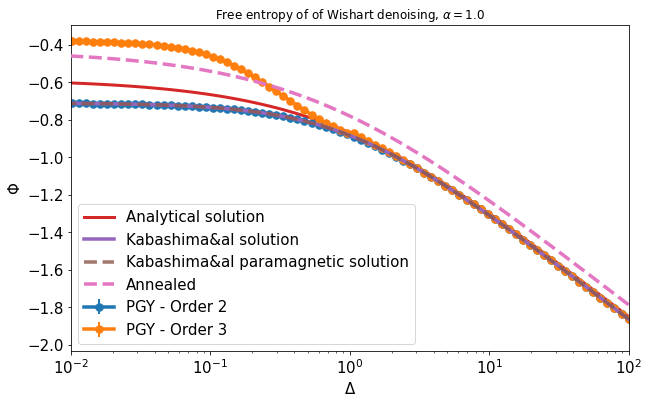

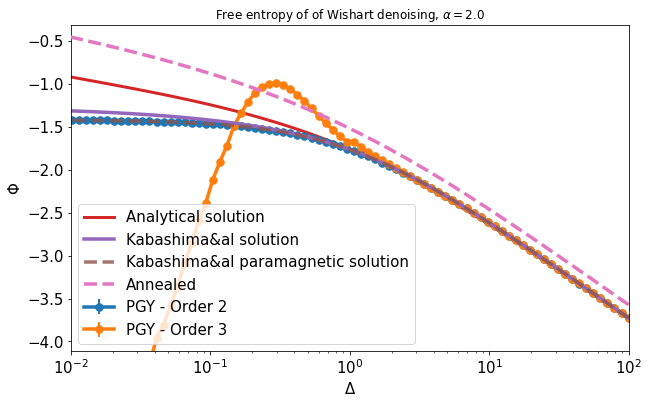

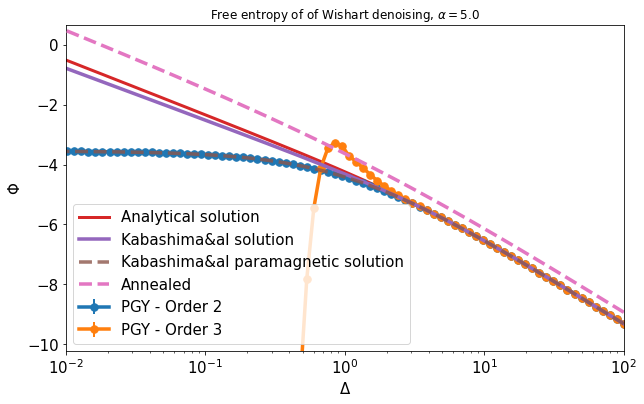

In [10]:
#Free entropy plots

for (i_a,alpha) in enumerate(alphas):
    fig, ax = plt.subplots(1, 1,figsize = (10,6))
    ax.tick_params(labelsize=15)
    ax.plot(Deltas[i_a]['Matytsin'], phis[i_a]['Matytsin'], linewidth = 3, label = r'Analytical solution', zorder = 0, color = colors[3])
    ax.errorbar(Deltas[i_a]['TAP_order_2'], np.mean(phis[i_a]['TAP_order_2'],axis=1), yerr = np.std(phis[i_a]['TAP_order_2'],axis=1), fmt = 'o-', label = r'PGY - Order 2', zorder = 1, 
               linewidth = 3.5, elinewidth = 2, markersize = 7.5, color = colors[0])
    ax.errorbar(Deltas[i_a]['TAP_order_3'], np.mean(phis[i_a]['TAP_order_3'],axis=1), yerr = np.std(phis[i_a]['TAP_order_3'],axis=1), fmt = 'o-', label = r'PGY - Order 3', zorder = 1, 
                linewidth = 3.5, elinewidth = 2, markersize = 7.5, color = colors[1])

    ax.plot(Deltas[i_a]['Kabashima'], phis[i_a]['Kabashima'], '-', label = r'Kabashima&al solution', linewidth = 3.5, color = colors[4])
    ax.plot(Deltas[i_a]['Kabashima_para'], phis[i_a]['Kabashima_para'], '--', label = r'Kabashima&al paramagnetic solution', linewidth = 3.5, alpha = 0.8, color = colors[5])
    ax.plot(Deltas[i_a]['Annealed'], phis[i_a]['Annealed'], '--', label = r'Annealed', linewidth = 3.5, zorder = 3, color = colors[6])

    #Plot the actual free entropy, easy to compute here
    ax.set_ylabel(r'$\Phi$', fontsize = 15)
    ax.set_xlabel(r'$\Delta$', fontsize = 15)
    ax.set_xscale('log')
    ax.set_xlim(1e-2, max(Deltas[i_a]['Matytsin']))
    ax.set_ylim(min(phis[i_a]['Matytsin'])*1.1, max(phis[i_a]['Matytsin'])*0.5)

    ax.legend(fontsize = 15)
    ax.set_title(r'Free entropy of of Wishart denoising, $\alpha = $'+str(alpha))
    #plt.savefig('figures/wishart_fentropy_alpha_'+str(alpha)+'.pdf')

# Symmetric orthogonal matrix denoising

In [12]:
Deltas_ort = {'Matytsin':None, 'RIE':None}
y_mses_ort = {'Matytsin':None, 'RIE':None}
NB_INSTANCES_ort = {'Matytsin':None, 'RIE':None}

Deltas_Wig = {'Matytsin':None, 'RIE':None}
y_mses_Wig = {'Matytsin':None, 'RIE':None}
NB_INSTANCES_Wig = {'Matytsin':None, 'RIE':None}

alphas_Wish = np.array([0.1, 0.5, 1.0, 2.0, 5.0])
Deltas_Wish = np.array([{'Matytsin':None, 'RIE':None} for alpha in alphas_Wish])
y_mses_Wish = np.array([{'Matytsin':None, 'RIE':None} for alpha in alphas_Wish])
NB_INSTANCES_Wish = np.array([{'Matytsin':None, 'RIE':None} for alpha in alphas_Wish])

## Matytsin solution

In [13]:
log_NB_points_x = 15
NB_POINTS_t = 3000
log_scale_t = True

filename = "Data/Matytsin_orthogonal_alpha_1.0_log_NB_points_x_"+str(log_NB_points_x)+"_NB_POINTS_t_"+str(NB_POINTS_t)+"_log_scale_t_"+str(int(log_scale_t))+".pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
Deltas_ort['Matytsin'] = results['Deltas']
y_mses_ort['Matytsin'] = results['y_MMSEs']  

filename = "Data/Matytsin_wigner_log_NB_points_x_"+str(log_NB_points_x)+"_NB_POINTS_t_"+str(NB_POINTS_t)+"_log_scale_t_"+str(int(log_scale_t))+".pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
Deltas_Wig['Matytsin'] = results['Deltas']
y_mses_Wig['Matytsin'] = results['y_MMSEs']  

for (i_a,alpha) in enumerate(alphas_Wish):
    filename = "Data/Matytsin_wishart_alpha_"+str(alpha)+"_log_NB_points_x_"+str(log_NB_points_x)+"_NB_POINTS_t_"+str(NB_POINTS_t)+"_log_scale_t_"+str(int(log_scale_t))+".pkl"
    infile = open(filename,'rb')
    results = pickle.load(infile)
    infile.close()
    Deltas_Wish[i_a]['Matytsin'] = results['Deltas']
    y_mses_Wish[i_a]['Matytsin'] = results['y_MMSEs']  

## RIE solution

In [14]:
M = 3000

filename = "Data/RIE_orthogonal_M_"+str(M)+"_sigma_1.0.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
NB_INSTANCES_ort['RIE'] = results['NB_INSTANCES']
Deltas_ort['RIE'] = results['Deltas']
y_mses_ort['RIE'] = results['y_mses']  

filename = "Data/RIE_wigner_M_"+str(M)+".pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
NB_INSTANCES_Wig['RIE'] = results['NB_INSTANCES']
Deltas_Wig['RIE'] = results['Deltas']
y_mses_Wig['RIE'] = results['y_mses']  

for (i_a,alpha) in enumerate(alphas_Wish):
    filename = "Data/RIE_wishart_M_"+str(M)+"_alpha_"+str(alpha)+".pkl"
    infile = open(filename,'rb')
    results = pickle.load(infile)
    infile.close()
    NB_INSTANCES_Wish[i_a]['RIE'] = results['NB_INSTANCES']
    Deltas_Wish[i_a]['RIE'] = results['Deltas']
    y_mses_Wish[i_a]['RIE'] = results['y_mses']  

## Comparison plot of the MSE

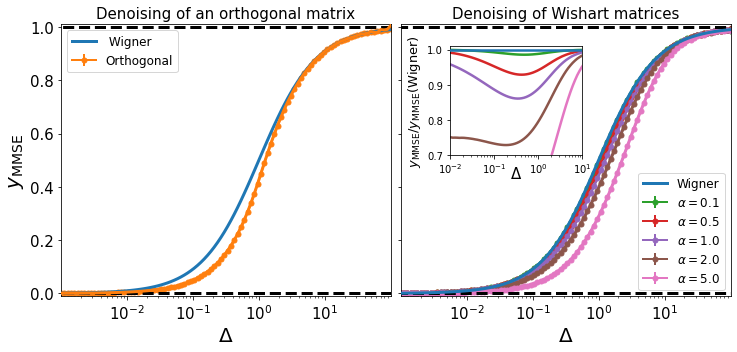

In [15]:
#MSE Plot
fig, axes = plt.subplots(1, 2,figsize = (12,5), sharey=True)
ax = axes[0]
ax.tick_params(labelsize=15)
ax.plot(Deltas_Wig['Matytsin'], y_mses_Wig['Matytsin'], linewidth = 3, zorder = 3, color = colors[0], label = r' Wigner')
ax.errorbar(Deltas_ort['RIE'], np.mean(y_mses_ort['RIE'],axis=1), yerr = np.std(y_mses_ort['RIE'],axis=1), fmt = 'o-', zorder = 1, 
           color = colors[1], markersize = 5, linewidth = 2, label = r'Orthogonal')
ax.plot(Deltas_ort['Matytsin'], y_mses_ort['Matytsin'], linewidth = 3, zorder = 3, color = colors[1])
    
ax.set_ylabel(r'$y_\mathrm{MMSE}$', fontsize = 20)
ax.set_xlabel(r'$\Delta$', fontsize = 20)
ax.set_xscale('log')
ax.plot([0,1e3],[0,0], '--', color='black', linewidth = 3)
ax.plot([0,1e3],[1,1], '--', color='black', linewidth = 3)
ax.set_ylim(-0.01,1.01)
ax.set_xlim(min(Deltas_ort['Matytsin']), max(Deltas_ort['Matytsin']))
ax.legend(fancybox=True, loc='best', fontsize = 12)
ax.set_title(r'Denoising of an orthogonal matrix', fontsize = 15)
ax.xaxis.set_major_locator(plt.FixedLocator([1e-2,1e-1,1e0,1e1]))


ax = axes[1]
ax.tick_params(labelsize=15)
ax.plot(Deltas_Wig['Matytsin'], y_mses_Wig['Matytsin'], linewidth = 3, zorder = 3, color = colors[0],
        label = r'Wigner')

for (i_a,alpha) in enumerate(alphas_Wish):
    ax.errorbar(Deltas_Wish[i_a]['RIE'], np.mean(y_mses_Wish[i_a]['RIE'],axis=1), yerr = np.std(y_mses_Wish[i_a]['RIE'],axis=1), fmt = 'o-', zorder = 1, color = colors[i_a+2], 
               markersize = 5, linewidth = 2, label = r'$\alpha = {0}$'.format(alpha))
    ax.plot(Deltas_Wish[i_a]['Matytsin'], y_mses_Wish[i_a]['Matytsin'], linewidth = 3, zorder = 0, 
       color = colors[i_a+2])
    
axins = ax.inset_axes([0.15, 0.52, 0.4, 0.4])
axins.set_xlim(1e-2, 1e1)
axins.set_ylim(0.7, 1.01)
axins.set_xscale('log')
axins.set_ylabel(r'$y_\mathrm{MMSE}/y_\mathrm{MMSE}(\mathrm{Wigner})$', fontsize = 13)
axins.set_xlabel(r'$\Delta$', fontsize = 15, labelpad = -10)
axins.plot(Deltas_Wig['Matytsin'], y_mses_Wig['Matytsin']/y_mses_Wig['Matytsin'], linewidth = 2.5, zorder = 3, color = colors[0], label = r'Wigner')
for (i_a,alpha) in enumerate(alphas_Wish):
    axins.plot(Deltas_Wish[i_a]['Matytsin'], y_mses_Wish[i_a]['Matytsin']/y_mses_Wig['Matytsin'], linewidth = 2.5, label = r'$\alpha = {0}$'.format(alpha), zorder = 0, 
       color = colors[i_a+2])
    
axins.tick_params(labelsize=10)
    
ax.set_xlabel(r'$\Delta$', fontsize = 20)
ax.set_xscale('log')
ax.plot([0,1e3],[0,0], '--', color='black', linewidth = 3)
ax.plot([0,1e3],[1,1], '--', color='black', linewidth = 3)
ax.set_xlim(min(Deltas_ort['Matytsin']), max(Deltas_ort['Matytsin']))
ax.legend(fancybox=True, loc='lower right', fontsize = 12)
ax.set_title(r'Denoising of Wishart matrices', fontsize = 15)


ax.xaxis.set_major_locator(plt.FixedLocator([1e-2,1e-1,1e0,1e1]))

plt.subplots_adjust(wspace=0.03)
#plt.savefig('figures/MMSE_different_ensembles.pdf')

# Large $\alpha$ limit: do we find back the BBP behavior?

## Loading data

In [16]:
alphas = np.array([5., 10., 100., 200., 500.])
Ms = np.array([6000, 6000, 10000, None, None]) #For the RIE
Delta0s = np.array([{'Matytsin':None, 'RIE':None} for alpha in alphas])
y_mses = np.array([{'Matytsin':None, 'RIE':None} for alpha in alphas])

In [17]:
log_NB_points_x = 16
NB_POINTS_t = 10000
log_scale_t = True

for (i_a,alpha) in enumerate(alphas):
    filename = "Data/Matytsin_wishart_large_alpha_alpha_"+str(alpha)+"_log_NB_points_x_"+str(log_NB_points_x)+"_NB_POINTS_t_"+str(NB_POINTS_t)+"_log_scale_t_"+str(int(log_scale_t))+".pkl"
    infile = open(filename,'rb')
    results = pickle.load(infile)
    infile.close()
    Delta0s[i_a]['Matytsin'] = results['Delta0s']
    y_mses[i_a]['Matytsin'] = results['y_MMSEs']
    
    M = Ms[i_a]
    if not(M is None):
        filename = "Data/RIE_wishart_large_alpha_M_"+str(M)+"_alpha_"+str(alpha)+".pkl"
        infile = open(filename,'rb')
        results = pickle.load(infile)
        infile.close()
        Delta0s[i_a]['RIE'] = results['Delta0s']
        y_mses[i_a]['RIE'] = results['y_mses']  

In [19]:
#The BBP performance for denoising
Deltas_BBP = 10**np.linspace(-2, 2, num = 1000)
MSE_BBP = np.ones_like(Deltas_BBP)
for (i, Delta) in enumerate(Deltas_BBP):
    if Delta < 1:
        MSE_BBP[i] = 1 - (1-Delta)**2

## Making the plot

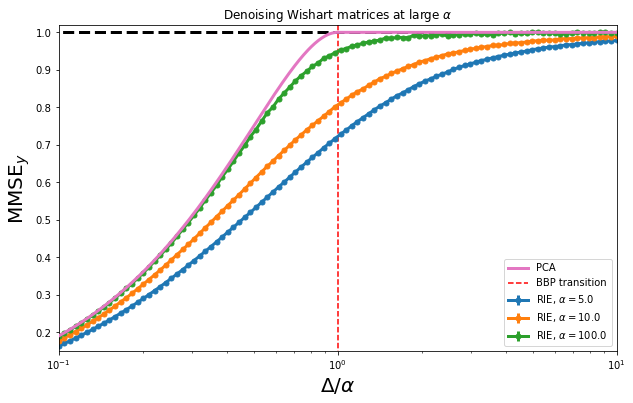

In [20]:
#MSE Plot

fig, ax = plt.subplots(1, 1,figsize = (10,6))
ax.plot(Deltas_BBP, MSE_BBP, linewidth = 3, zorder = 3, color = colors[6], label = r'PCA')
ax.plot([1,1],[-10,10],'--', color = 'red', linewidth = 1.5, zorder = 0, label = r'BBP transition')

for (i_a,alpha) in enumerate(alphas):
    if not(Ms[i_a] is None):
        ax.errorbar(Delta0s[i_a]['RIE'], np.mean(y_mses[i_a]['RIE'],axis=1), yerr = np.std(y_mses[i_a]['RIE'],axis=1), fmt = 'o-', zorder = 1, color = colors[i_a], markersize = 5, linewidth = 3, label = r'RIE, $\alpha = {0}$'.format(alpha))
  
ax.set_xlabel(r'$\Delta / \alpha$', fontsize = 20)
ax.set_ylabel(r'$\mathrm{MMSE}_y$', fontsize = 20)
ax.set_xscale('log')
ax.plot([0,1e3],[0,0], '--', color='black', linewidth = 3, zorder = 0)
ax.plot([0,1e3],[1,1], '--', color='black', linewidth = 3, zorder = 0)
ax.set_xlim(min(Delta0s[0]['Matytsin']), max(Delta0s[0]['Matytsin']))
ax.set_ylim(0.15, 1.02)
ax.legend(fancybox=True, loc='best')

ax.set_title(r'Denoising Wishart matrices at large $\alpha$')

plt.subplots_adjust(wspace=0.03)
#plt.savefig('figures/MMSE_large_alpha.pdf', bbox_inches = 'tight')

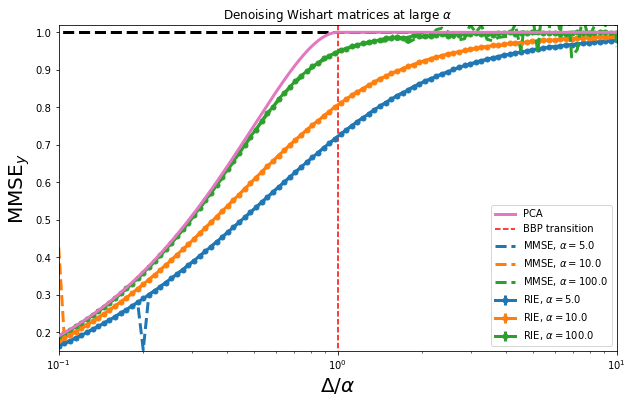

In [21]:
#MSE Plot, with the Matytsin curves 
fig, ax = plt.subplots(1, 1,figsize = (10,6))
ax.plot(Deltas_BBP, MSE_BBP, linewidth = 3, zorder = 3, color = colors[6], label = r'PCA')
ax.plot([1,1],[-10,10],'--', color = 'red', linewidth = 1.5, zorder = 0, label = r'BBP transition')

for (i_a,alpha) in enumerate(alphas):
    if not(Ms[i_a] is None):
        ax.plot(Delta0s[i_a]['Matytsin'], y_mses[i_a]['Matytsin'], '--', linewidth = 3, zorder = 2, color = colors[i_a], label = r'MMSE, $\alpha = {0}$'.format(alpha))
        ax.errorbar(Delta0s[i_a]['RIE'], np.mean(y_mses[i_a]['RIE'],axis=1), yerr = np.std(y_mses[i_a]['RIE'],axis=1), fmt = 'o-', zorder = 1, color = colors[i_a], markersize = 5, linewidth = 3, label = r'RIE, $\alpha = {0}$'.format(alpha))

ax.set_xlabel(r'$\Delta / \alpha$', fontsize = 20)
ax.set_ylabel(r'$\mathrm{MMSE}_y$', fontsize = 20)
ax.set_xscale('log')
ax.plot([0,1e3],[0,0], '--', color='black', linewidth = 3, zorder = 0)
ax.plot([0,1e3],[1,1], '--', color='black', linewidth = 3, zorder = 0)
ax.set_xlim(min(Delta0s[0]['Matytsin']), max(Delta0s[0]['Matytsin']))
ax.set_ylim(0.15, 1.02)
ax.legend(fancybox=True, loc='best')

ax.set_title(r'Denoising Wishart matrices at large $\alpha$')
plt.subplots_adjust(wspace=0.03)

#plt.savefig('figures/MMSE_large_alpha_with_matytsin.pdf', bbox_inches = 'tight')